In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

<h1> Notes 2 </h1>

In [3]:
df = pd.read_csv("../../../resources/data/500_Person_Gender_Height_Weight_Index.csv")  
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [9]:
df['obese'] = (df['Index']>4).astype(int)
df.drop('Index',axis=1,inplace=True)

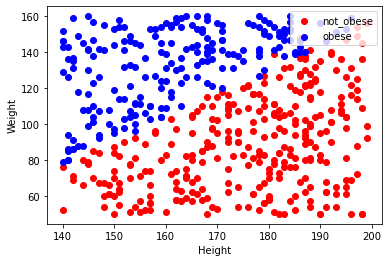

In [11]:
is_ob = df[df['obese']==0].drop('obese',axis=1)
ob = df[df['obese']==1].drop('obese',axis=1)
plt.scatter(is_ob['Height'],is_ob['Weight'],color='r',label='not_obese')
plt.scatter(ob['Height'],ob['Weight'],color='b',label='obese')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

In [59]:
a = df[df['Weight']<120]['obese']==1

print(len(a))
print(sum(a))
print(sum(a)/len(a))

312
51
0.16346153846153846


In [51]:
def entropy(y):
    """
    
    """
    counter =  collections.Counter(y)
    p = np.array(list(counter.values()))/len(y)
    return -np.sum(p*np.log2(p))

In [65]:
weights = df['Weight'].unique()
data = np.array([0,0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    a = df[df['Weight']<weight]
    b = df[df['Weight']>weight]
    e = entropy(a['obese'])
    e_1 = entropy(b['obese'])
    data = np.vstack([data,[weight,e,e_1]])

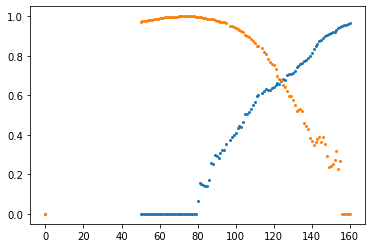

In [66]:
plt.scatter(data[:,0],data[:,1],s=4,label='<weight')
plt.scatter(data[:,0],data[:,2],s=4,label='>weight')

information gain

In [55]:
def inf_gain(y,mask,func=entropy):
    y_left = y[mask]
    y_right = y[-mask]
    return func(y)-(len(y_left)/len(y)*func(y_left) + len(y_right)/len(y)*func(y_right))

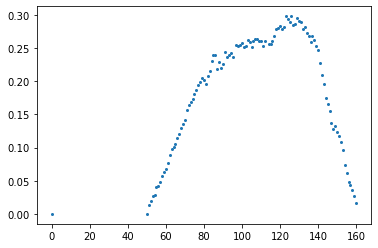

In [57]:
weights = df['Weight'].unique()
data = np.array([0,0])
for i in range(1,len(weights)):
    weight = weights[i]
    mask = df['Weight']<weight
    e = inf_gain(df['obese'],mask)
    data = np.vstack([data,[weight,e]])
plt.scatter(data[:,0],data[:,1],s=4)    